In [2]:
import sys
sys.path.insert(0, "../")

In [3]:
from utils.trajectory import project
import numpy as np
import matplotlib.pyplot as plt
from utils.data import Cifar100Dataset
import torch

/home/acowlagi/envs/torch_py39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def get_probs(fdir, model_name, task_name, seed):
    
    # load pretraining
    pretraining_probs = np.load(f"{fdir}/pretraining/{task_name}/{model_name}_seed_{seed}/probs.npy")

    # load finetuning
    finetuning_probs = np.load(f"{fdir}/finetuning/{task_name}/{model_name}_seed_{seed}/probs.npy")

    return pretraining_probs, finetuning_probs

## Task 0,1,2,3,4

In [5]:
task_name = "0_1_2_3_4"
task_labs = [int(i) for i in task_name.split("_")]

dataset = Cifar100Dataset(task_labs, permute= False)
trainloader, testloader = dataset.fetch_data_loaders(bs = 256, shuf = False)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
train_data = torch.cat([batch[1] for batch in trainloader])
# create a one-hot encoded tensor from the concatenated tensor
all_labels = torch.nn.functional.one_hot(train_data, num_classes=5).numpy()


In [7]:
fdir="../probs/SimCLR"
model_name = "cifar10_resnet18_lr_0.05_decay_0.0001_bsz_256_temp_0.07_cosine"

In [8]:
seed = 0
pretraining_probs, finetuning_probs = get_probs(fdir=fdir, model_name=model_name, task_name=task_name, seed=seed)

In [9]:
start = np.sqrt(np.zeros_like(all_labels) + 0.2)
end = np.sqrt(all_labels)
traj = np.sqrt(finetuning_probs)

In [10]:
progress = project(traj=traj, start=start, end = end)

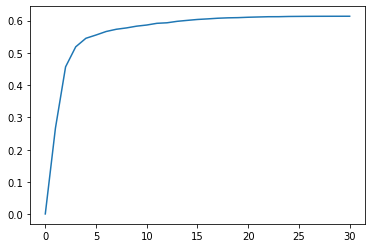

In [11]:
plt.plot(progress)